## **Import important Libraries**

In [4]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

Generic step
1. Design model (input size, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update weights

### 0) Prepare data

In [5]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

### 1) Model

In [6]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

### 2) Loss and optimizer

In [7]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 3) Training loop

epoch: 10, loss: 4293.3262
epoch: 20, loss: 3204.4360
epoch: 30, loss: 2416.7981
epoch: 40, loss: 1846.4481
epoch: 50, loss: 1433.0250
epoch: 60, loss: 1133.0724
epoch: 70, loss: 915.2584
epoch: 80, loss: 756.9656
epoch: 90, loss: 641.8435
epoch: 100, loss: 558.0628


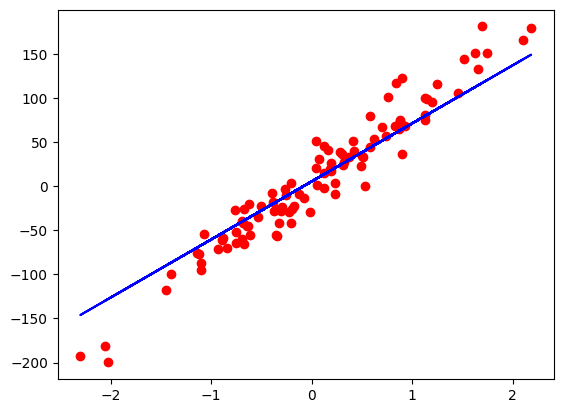

In [8]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')
    
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()